## Analysis of two works of science fiction
- Same author: E. E. Smith
- Both texts are related to space specifically

### Extract text from novels by bs4 and nltk

In [71]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', "", u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL, minLength=15):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),minLength)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/68815/pg68815.txt', 30)
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/cache/epub/21647/pg21647.txt', 30)

### Plot differences in word frequency for each text

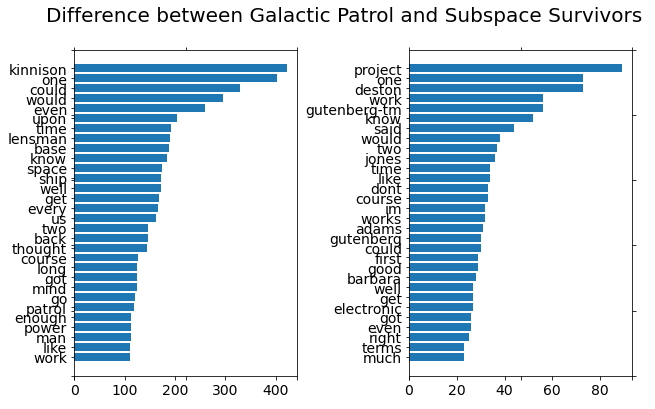

In [72]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Galactic Patrol and Subspace Survivors')

## Compare word frequency between separate authors

### Comparing H.G. Wells and E.E. Smith
- Galactic Patrol and War of the Worlds
- Again, new work is also in science fiction genre

text for galactic patrol:  [('work', 110), ('like', 111), ('man', 112), ('power', 113), ('enough', 113), ('patrol', 119), ('go', 121), ('mind', 124), ('got', 124), ('long', 125), ('course', 127), ('thought', 144), ('back', 146), ('two', 147), ('us', 162), ('every', 167), ('get', 168), ('well', 172), ('ship', 173), ('space', 174), ('know', 185), ('base', 188), ('lensman', 190), ('time', 192), ('upon', 205), ('even', 260), ('would', 295), ('could', 330), ('one', 403), ('kinnison', 422)]
text for war of the worlds:  [('martian', 77), ('pit', 79), ('two', 80), ('way', 86), ('like', 87), ('first', 88), ('brother', 90), ('project', 90), ('seemed', 91), ('still', 92), ('across', 96), ('went', 99), ('men', 99), ('would', 99), ('night', 99), ('road', 99), ('us', 104), ('little', 112), ('man', 113), ('black', 117), ('could', 117), ('time', 119), ('towards', 129), ('saw', 130), ('came', 148), ('people', 159), ('martians', 159), ('said', 166), ('upon', 173), ('one', 191)]


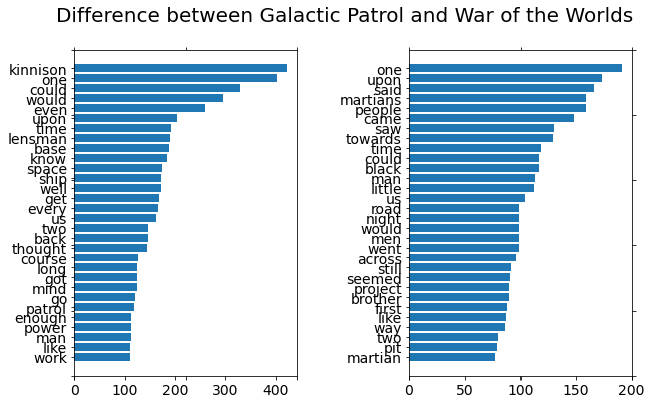

In [73]:
(wf_3, tw_3) = get_wf('https://www.gutenberg.org/cache/epub/36/pg36.txt', 30)
plotTwoLists (wf_ee, wf_3, 'Difference between Galactic Patrol and War of the Worlds')
print("text for galactic patrol: ", wf_ee)
print("text for war of the worlds: ", wf_3)

- Subspace Survivors and War of the Worlds

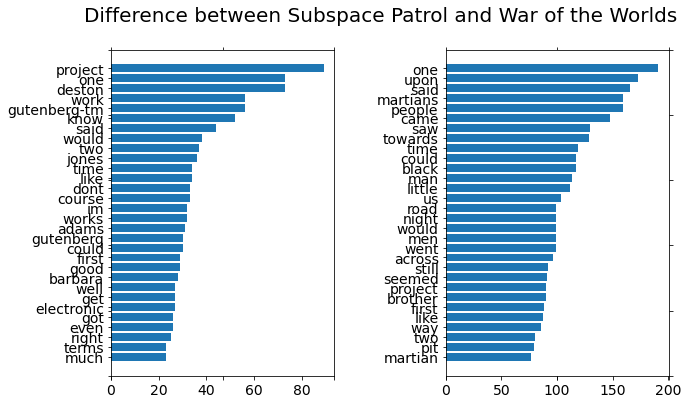

In [74]:
plotTwoLists (wf_bu, wf_3, 'Difference between Subspace Patrol and War of the Worlds')

### Determine intersection in each document

In [75]:
wf_ee_words, t1 = zip(*wf_ee)
wf_bu_words, t2 = zip(*wf_bu)
wf_3_words, t3 = zip(*wf_3)
print("Commonalities between Galactic Patrol and Subspace Survivors: ", list(set(wf_ee_words) & set(wf_bu_words)))
print("Commonalities between Galactic Patrol and War of the Worlds: ", list(set(wf_ee_words) & set(wf_3_words)))
print("Commonalities between Subspace Survivors and War of the Worlds: ", list(set(wf_bu_words) & set(wf_3_words)))

Commonalities between Galactic Patrol and Subspace Survivors:  ['well', 'like', 'would', 'work', 'time', 'get', 'two', 'got', 'could', 'even', 'know', 'one', 'course']
Commonalities between Galactic Patrol and War of the Worlds:  ['like', 'would', 'us', 'time', 'two', 'could', 'man', 'one', 'upon']
Commonalities between Subspace Survivors and War of the Worlds:  ['like', 'would', 'first', 'time', 'two', 'could', 'said', 'one', 'project']


## Analysis

### What was the question?
- How similar are different works of sci-fi? Between one author and two authors? 
- Is there significant difference in word choice between American and English authors?

### What was the approach?
- Visualize most frequently utilized words between all utilized works
- Analyze intersection of words between each work and relative frequency

### Works of E.E. Smith
- Some proper nouns appear and are highly ranked: irrelevant for analysis
    - except if we consider the frequency with which an author addresses characters pertinent
- 13/30 of the top ranked words are the same

### Works of E.E. Smith vs H.G. Wells
- Galactic Patrol and War of the Worlds
    - 9/30 of the top ranked words are the same
- Subspace Survivors and War of the Worlds
    - 9/30 of the top ranked words are the same

### What new ideas did this generate?
- The questions posed in this project cannot be answered through this microscopic analysis
- Perform automated analysis of many sci-fi works, determining intersection of words and frequencies
- Do the same for differing genres, analyzing on the whole differences in word choice for American and English authors

### Challenges
- There were bugs in the code from out of the box
- Some characters like '' were being interpreted as words
- Adapting preexisting text analysis code to support new functionality